# Librerías

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lectura de resultados

In [74]:
r_10x = pd.read_excel('Resultados.xlsx', sheet_name = "10X_PBMC", skiprows = 1)
r_liver = pd.read_excel('Resultados.xlsx', sheet_name = "Human Liver", skiprows = 1) 

In [75]:
cols = ['Método', 'ACC', 'NMI', 'ARI']

r_10x = r_10x[cols].dropna()
r_liver = r_liver[cols].dropna()

In [76]:
metodos = ['Seurat', 'Autoencoder GMM', 'Autoencoder + BIRCH', 
           'Log + Normalización + PCA + KMeans ', 
           'Log + Normalización + PCA + BIRCH']

r_10x = r_10x.loc[r_10x['Método'].isin(metodos)]
r_liver = r_liver.loc[r_liver['Método'].isin(metodos)]

# Gráfico de métricas

In [77]:
replace = {
    'Autoencoder GMM': 'AE-GMM',
    'Autoencoder + BIRCH': 'AE-Birch',
    'Log + Normalización + PCA + KMeans ': 'PCA-KMeans',
    'Log + Normalización + PCA + BIRCH': 'PCA-Birch'
}

In [78]:
r_10x['Método'] = r_10x['Método'].replace(replace)
r_liver['Método'] = r_liver['Método'].replace(replace)

In [79]:
r_10x['dataframe'] = '10XPBMC'
r_liver['dataframe'] = 'Human Liver'

In [80]:
r_10x = r_10x.melt(['Método', 'dataframe'], var_name = 'metric', value_name = 'value')
r_liver = r_liver.melt(['Método', 'dataframe'], var_name = 'metric', value_name = 'value')

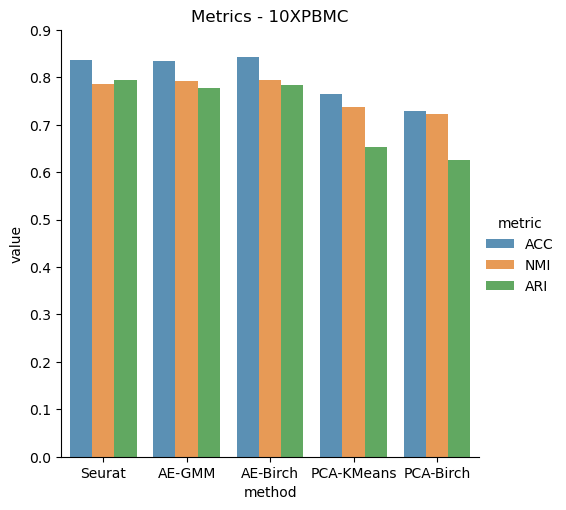

In [97]:
sns.set_palette(sns.color_palette(palette='tab10'))

sns.catplot(x='Método', y='value', hue='metric', data=r_10x, kind='bar', alpha = 0.8).set(
    ylim = (0,0.9),
    ylabel = 'value',
    xlabel = 'method',
    title = 'Metrics - 10XPBMC')

plt.savefig('results/metrics_10XPBMC.png', bbox_inches='tight')

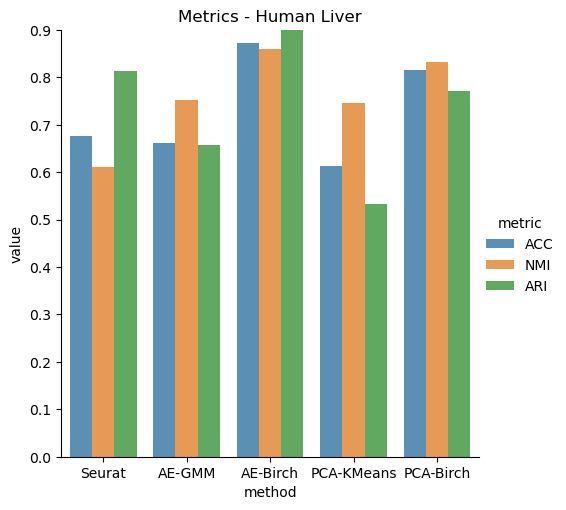

In [98]:
sns.catplot(x='Método', y='value', hue='metric', data=r_liver, kind='bar', alpha = 0.8).set(
    ylim = (0,0.9),
    ylabel = 'value',
    xlabel = 'method',
    title = 'Metrics - Human Liver')

plt.savefig('results/metrics_Human_Liver.png', bbox_inches='tight')